In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
df = pd.read_csv('data/BARTEstimationFile.csv', parse_dates=['MONTH'], index_col='MONTH')
df.head()


,RIDERS,STATIONS,CASH_FARE_2010USD_BART,AVG_FARE_2010USD_BART,HH,HH_0VEH,POP,WORKERS,MEDIAN_HHINC_2010USD,SERVMILES_E_BART,...,EDHEALTH_EMP,LEISURE_EMP,OTHER_EMP,FUEL_PRICE_2010USD,FUEL_COST_2010USD,TOLL_BB_PK_2010USD,TOLL_BB_OP_2010USD,TOLL_BB_CARPOOL_2010USD,CASUAL_CARPOOL,BART_STRIKE
MONTH,,,,,,,,,,,,,,,,,,,,,
2001-01-01,321180.5238,39,3.262745,2.555435,1452556.571,187359.1429,3870692.571,1924489.571,85841.07733,25527.10573,...,314779.0,179565.0,1317382.0,2.240335,0.101833,2.490645,2.490645,0.0,1,0
2001-02-01,334885.1053,39,3.249754,2.545259,1452696.413,187278.4921,3870052.746,1923471.413,85401.59874,25527.10573,...,319473.0,181972.0,1321821.0,2.227694,0.101182,2.480728,2.480728,0.0,1,0
2001-03-01,340021.5455,39,3.242376,2.539481,1452836.254,187197.8413,3869412.921,1922453.254,85110.28356,25527.10573,...,321266.0,184828.0,1331919.0,2.290702,0.103965,2.475096,2.475096,0.0,1,0
2001-04-01,333794.4286,39,3.229546,2.529432,1452976.095,187117.1905,3868773.095,1921435.095,84676.45762,25527.10573,...,321919.0,185372.0,1308563.0,2.436951,0.110519,2.465302,2.465302,0.0,1,0
2001-05-01,333847.4545,39,3.215007,2.518045,1453115.937,187036.5397,3868133.270,1920416.937,84198.65633,25527.10573,...,323980.0,188738.0,1302376.0,2.532738,0.114777,2.454204,2.454204,0.0,1,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11600e6a0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x116076898>], dtype=object)

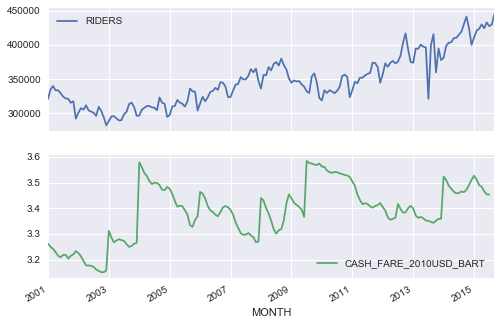

In [5]:
df[['RIDERS','CASH_FARE_2010USD_BART']].plot(subplots=True)


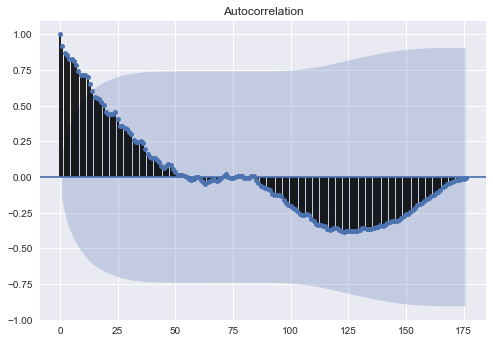

In [6]:
fig = sm.graphics.tsa.plot_acf(df['RIDERS'], lags=176)


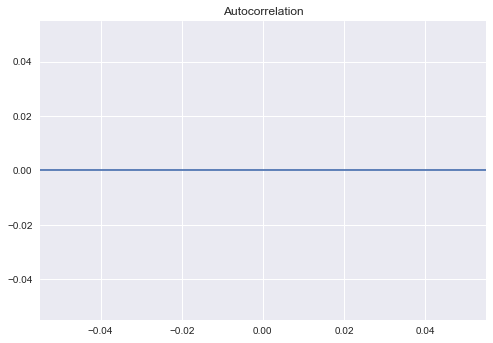

In [8]:
fig = sm.graphics.tsa.plot_acf(df['CASH_FARE_2010USD_BART'], lags=15)


In [9]:
 df['RIDERS_DIFF'] = df['RIDERS'] -  df['RIDERS'].shift(12)  
 

In [13]:
mod = smf.ols('RIDERS_DIFF ~ CASH_FARE_2010USD_BART', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            RIDERS_DIFF   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.593
Date:                Fri, 05 May 2017   Prob (F-statistic):              0.109
Time:                        00:18:24   Log-Likelihood:                -1844.9
No. Observations:                 163   AIC:                             3694.
Df Residuals:                     161   BIC:                             3700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -7.52